Import all libraries and path of files

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
DataFolder="C:\Users\Manuel\Documents\Polimi\Building systems\Project\Phyton"
DataSetName="energydata_complete.csv"


Read the dataframe and change the numerical index to a data index

In [2]:
completeDataPath=DataFolder+"/"+DataSetName
completeDF=pd.read_csv(completeDataPath,sep = ",",index_col=0)
previousIndex= completeDF.index
NewparsedIndex = pd.to_datetime(previousIndex)
completeDF.index= NewparsedIndex


Find the target variable (Appliances), and all the correlations with other features. corrAppliance is the correlation of appliance with alla feature.

In [3]:
DFtarget=completeDF[["Appliances"]]
corrAppliance=completeDF.corr().head(1)
corrAppliance>0.08

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,True,True,False,True,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


Use the heat map in order to visualize the correlation

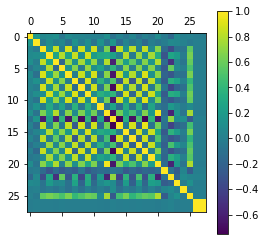

In [4]:
plt.figure()
plt.matshow(completeDF.corr())
plt.colorbar()
plt.show()

As we can see, there is low correlation for Appliances, our model will be with a low quality.
Most reliable variables are lights,RH1,T2,T3,T6,Tout,Windspeed. Let's find a correlation with shifted one

Define a function to find shifted variables

In [42]:
def lag_column(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name = column_name+"-"+str(i)+" day"
        df[new_column_name]=df[column_name].shift(6*24*i)
    return df

Let's try with temperature 

In [43]:
DF_temperature_out = completeDF[['T_out']]

DF_tout_lagged=lag_column(DF_temperature_out,'T_out',3)
DF_corr_Tout=DFtarget.join([DF_tout_lagged])
DF_corr_Tout.corr().head(1)

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Appliances,T_out,T_out-1 day,T_out-2 day,T_out-3 day
Appliances,1.0,0.099155,0.105597,0.096871,0.102374


Try with lights

In [44]:
DF_lights = completeDF[['lights']]
DF_lights_lagged=lag_column(DF_lights,"lights",1)
DF_corr_lights=DFtarget.join([DF_lights_lagged])
DF_corr_lights.corr().head(1)

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Appliances,lights,lights-1 day
Appliances,1.0,0.197278,0.126514


Try with RH1

In [45]:
DF_RH1 = completeDF[['RH_1']]
DF_RH1_lagged=lag_column(DF_RH1,"RH_1",0)
DF_corr_RH1=DFtarget.join([DF_RH1_lagged])
DF_corr_RH1.corr().head(1)

,Appliances,RH_1
Appliances,1.0,0.086031


Try with appliances

In [46]:
DF_Appliances = completeDF[['Appliances']]
DF_Appliances_lagged=lag_column(DF_Appliances,"Appliances",6)
DF_Appliances_lagged.corr().head(1)

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Appliances,Appliances-1 day,Appliances-2 day,Appliances-3 day,Appliances-4 day,Appliances-5 day,Appliances-6 day
Appliances,1.0,0.216741,0.16324,0.151028,0.153548,0.181109,0.173593


Try with T2

In [47]:
DF_T2 = completeDF[['T2']]
DF_T2_lagged=lag_column(DF_T2,"T2",2)
DF_corr_T2=DFtarget.join([DF_T2_lagged])
DF_corr_T2.corr().head(1)
#DF_T2_lagged

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Appliances,T2,T2-1 day,T2-2 day
Appliances,1.0,0.120073,0.098054,0.099846


Try with T3

In [48]:
DF_T3 = completeDF[['T3']]
DF_T3_lagged=lag_column(DF_T3,"T3",0)
DF_corr_T3=DFtarget.join([DF_T3_lagged])
DF_corr_T3.corr().head(1)

,Appliances,T3
Appliances,1.0,0.08506


Not use T3 correlation

Try with T6

In [49]:
DF_T6 = completeDF[['T6']]
DF_T6_lagged=lag_column(DF_T6,"T6",4)
DF_corr_T6=DFtarget.join([DF_T6_lagged])
DF_corr_T6.corr().head(1)

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Appliances,T6,T6-1 day,T6-2 day,T6-3 day,T6-4 day
Appliances,1.0,0.117638,0.123183,0.117044,0.119864,0.12998


Try with windspeed

In [50]:
DF_Windspeed = completeDF[['Windspeed']]
DF_Windspeed_lagged=lag_column(DF_Windspeed,"Windspeed",2)
DF_corr_Windspeed=DFtarget.join([DF_Windspeed_lagged])
DF_corr_Windspeed.corr().head(1)

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Appliances,Windspeed,Windspeed-1 day,Windspeed-2 day
Appliances,1.0,0.087122,0.09446,0.069074


Now try to find a correlation in shorted time(10 minutes) instead of days:

In [51]:
def lag_column_short(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name = column_name+"-"+str(i)+" times 10 minutes"
        df[new_column_name]=df[column_name].shift(i)
    return df

DF_temperature_out = completeDF[['T_out']]
DF_tout_lagged_short=lag_column_short(DF_temperature_out,'T_out',5)
DF_tout_lagged_short

Join all data 

In [52]:
DF_FinalSet=DFtarget.join([DF_lights_lagged,completeDF[['RH_1']],DF_Appliances_lagged.drop(["Appliances"],axis=1),DF_T2_lagged,completeDF[['T3']],DF_T6_lagged,DF_Windspeed_lagged])

Set variables for day and night, day of the week and month of the year

In [53]:
DF_FinalSet['hour']=DF_FinalSet.index.hour
DF_FinalSet['day_of_week']=DF_FinalSet.index.dayofweek
DF_FinalSet['month']=DF_FinalSet.index.month
DF_FinalSet['week_of_the_year']=DF_FinalSet.index.week

DF_FinalSet

,Appliances,lights,lights-1 day,RH_1,Appliances-1 day,Appliances-2 day,Appliances-3 day,Appliances-4 day,Appliances-5 day,Appliances-6 day,...,T6-2 day,T6-3 day,T6-4 day,Windspeed,Windspeed-1 day,Windspeed-2 day,hour,day_of_week,month,week_of_the_year
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,NaN,47.596667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.000000,NaN,NaN,17,0,1,2
2016-01-11 17:10:00,60,30,NaN,46.693333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.666667,NaN,NaN,17,0,1,2
2016-01-11 17:20:00,50,30,NaN,46.300000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.333333,NaN,NaN,17,0,1,2
2016-01-11 17:30:00,50,40,NaN,46.066667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.000000,NaN,NaN,17,0,1,2
2016-01-11 17:40:00,60,40,NaN,46.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.666667,NaN,NaN,17,0,1,2
2016-01-11 17:50:00,50,40,NaN,46.026667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.333333,NaN,NaN,17,0,1,2
2016-01-11 18:00:00,60,50,NaN,45.766667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.000000,NaN,NaN,18,0,1,2
2016-01-11 18:10:00,60,50,NaN,45.560000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.166667,NaN,NaN,18,0,1,2
2016-01-11 18:20:00,60,40,NaN,45.597500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.333333,NaN,NaN,18,0,1,2


Define dayDetector function and week-end function and put that value in final dataset

In [54]:
def weekendDetector(day):
    weekendLabel=0
    if(day == 5 or day == 6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel

def dayDetector(hour):
    dayLabel=1
    if(hour<20 and hour>9):
        dayLabel=1
    else:
        dayLabel=0
    return dayLabel


simpleVectorOfDays = [0,1,2,3,4,5,6]
weekendOrNotVector = [weekendDetector(thisDay) for thisDay in simpleVectorOfDays]


hoursOfDayVector= range(0,24,1)
dayOrNotVEctor =[dayDetector(ThisHour) for ThisHour in hoursOfDayVector]

DF_FinalSet["weekend"] = [weekendDetector(thisDay) for thisDay in DF_FinalSet.index.dayofweek]
DF_FinalSet["day_nigth"] = [dayDetector(thisHour) for thisHour in DF_FinalSet.index.hour]
DF_FinalSet.dropna(inplace=True)

Let's try to build a model

In [55]:
DF_FinalSet.corr().head(1)

,Appliances,lights,lights-1 day,RH_1,Appliances-1 day,Appliances-2 day,Appliances-3 day,Appliances-4 day,Appliances-5 day,Appliances-6 day,...,T6-4 day,Windspeed,Windspeed-1 day,Windspeed-2 day,hour,day_of_week,month,week_of_the_year,weekend,day_nigth
Appliances,1.0,0.184121,0.126829,0.087794,0.222404,0.157945,0.150795,0.153307,0.180735,0.173593,...,0.134204,0.091565,0.099835,0.062533,0.21702,-0.002467,0.004185,0.005487,0.015963,0.302921


Remove day of the week, month, week of the year and weekend predictors from features.

In [56]:
DF_FinalSet.corr().head(1)

DF_features = DF_FinalSet.drop(["Appliances","day_of_week","month","week_of_the_year","weekend"],axis=1)
DF_target=DF_FinalSet[["Appliances"]]

In [57]:
#import sklearn to define test and train, test size is the fraction that will be test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (DF_features,DF_target,test_size=0.2)

In [58]:
#First model is simple linear model
from sklearn import linear_model
linear_reg=linear_model.LinearRegression() #empty alghoritm that we fill with fit

Fit the algorithm with X train and Y train and predict Appliances

In [59]:
linear_reg.fit(X_train,Y_train)
predict_linearAppliances=linear_reg.predict(X_test)

Fill a DF with predicted values and Y_test for a period and plot to show the results.

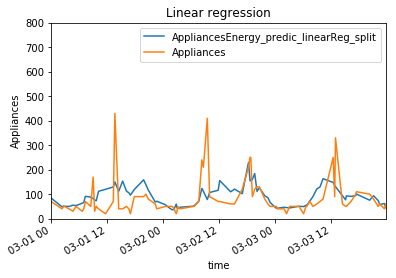

In [60]:
#How to extract index of Y_test---> Y_test.index
predict_DF_linearReg_split=pd.DataFrame(predict_linearAppliances,index =Y_test.index,columns =["AppliancesEnergy_predic_linearReg_split"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)
#Now we have a DF in which we have predicted value and value of completeDF, let's see if the prediction is good: plot a period and see if hte curves match
predict_DF_linearReg_split_period=predict_DF_linearReg_split["2016-03-01":"2016-03-03"]

plt.figure()
predict_DF_linearReg_split_period.plot()
plt.xlabel("time")
plt.ylabel("Appliances")
plt.ylim([0,800])
plt.title("Linear regression")
plt.show()

Let's find the metrics.

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error_linearREG=mean_squared_error(Y_test,predict_linearAppliances)
mean_absolute_error_linearREG=mean_absolute_error(Y_test,predict_linearAppliances)
R2_score_linearReg= r2_score(Y_test,predict_linearAppliances)
print "R2 index is "+str(R2_score_linearReg)
print "mean squared error is "+str(mean_squared_error_linearREG)
print "mean absolute error is "+str(mean_absolute_error_linearREG)

R2 index is 0.194054450619
mean squared error is 8549.25166663
mean absolute error is 52.0160367449


Let's use cross validation

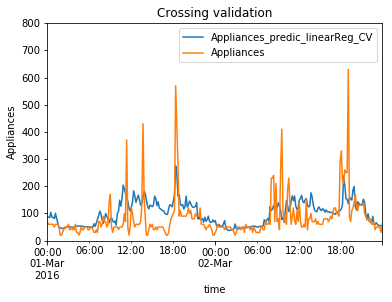

In [62]:
from sklearn.model_selection import cross_val_predict

predict_linearReg_CV=cross_val_predict(linear_reg,DF_features,DF_target,cv =10)
#Lets put in a DF
predict_DF_linearReg_CV=pd.DataFrame(predict_linearReg_CV,index =DF_target.index,columns =["Appliances_predic_linearReg_CV"])
predict_DF_linearReg_CV=predict_DF_linearReg_CV.join(DF_target)  #use DF target instead of Y_test
predict_DF_linearReg_CV_period= predict_DF_linearReg_CV["2016-03-01":"2016-03-02"] 

plt.figure()
predict_DF_linearReg_CV_period.plot()
plt.xlabel("time")
plt.ylabel("Appliances")
plt.ylim([0,800])
plt.title("Crossing validation")
plt.show()

Let's find the metrics

In [63]:
mean_squared_error_CV=mean_squared_error(DF_target,predict_linearReg_CV)
mean_absolute_error_CV=mean_absolute_error(DF_target,predict_linearReg_CV)
R2_score_CV= r2_score(DF_target,predict_linearReg_CV)
print "R2 index is "+str(R2_score_CV)
print "mean squared error is "+str(mean_squared_error_CV)
print "mean absolute error is "+str(mean_absolute_error_CV)

R2 index is 0.16012427203
mean squared error is 8540.13264941
mean absolute error is 52.1803285338


Now use Random Forest regressor to find another model

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg_RF=RandomForestRegressor()

predict_RF_CV=cross_val_predict(reg_RF,DF_features,DF_target,cv =10) #heavy procedure

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\model_selection\_validation.py:474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Do the DF, plot and find the metrics

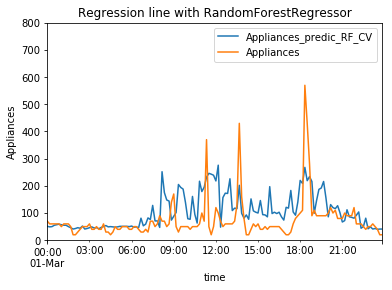

R2 index is -0.209513992543
mean squared error is 12298.736103
mean absolute error is 67.8076943458


In [65]:
predict_DF_RF_CV=pd.DataFrame(predict_RF_CV,index =DF_target.index,columns =["Appliances_predic_RF_CV"])
predict_DF_RF_CV=predict_DF_RF_CV.join(DF_target)
predict_DF_RF_CV_period= predict_DF_RF_CV["2016-03-01":"2016-03-01"]
plt.figure()
predict_DF_RF_CV_period.plot()
plt.xlabel("time")
plt.ylabel("Appliances")
plt.ylim([0,800])
plt.title("Regression line with RandomForestRegressor")
plt.show()

mean_squared_error_RF=mean_squared_error(DF_target,predict_RF_CV)
mean_absolute_error_RF=mean_absolute_error(DF_target,predict_RF_CV)
R2_score_RF= r2_score(DF_target,predict_RF_CV)
print "R2 index is "+str(R2_score_RF)
print "mean squared error is "+str(mean_squared_error_RF)
print "mean absolute error is "+str(mean_absolute_error_RF)

Random Forest has bad fitting model since R2 is negative.


Now try to use another model called Supported Vector Regression, that uses normalize data

In [66]:
from sklearn.svm import SVR
reg_SVR = SVR(kernel='rbf',C=10,gamma=1)

def normalize(df):
    return (df-df.min())/(df.max()-df.min())

DF_features_norm=normalize(DF_features)
DF_target_norm=normalize(DF_target)

Predict the data with SVR

In [67]:
predict_SVR_CV = cross_val_predict(reg_SVR,DF_features_norm,DF_target_norm,cv=10) #very heavy procedure
predict_DF_SVR_CV=pd.DataFrame(predict_SVR_CV, index = DF_target_norm.index,columns=["AC_ConsPred_SVR_CV"])
predict_DF_SVR_CV = predict_DF_SVR_CV.join(DF_target_norm).dropna()

C:\Users\Manuel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Plot the results and compute the metrics

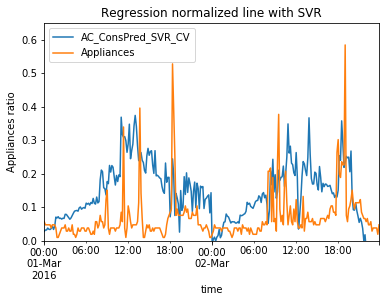

R2 index is -0.539418245242
mean squared error is 0.0139313911132
mean absolute error is 0.085280633464


In [69]:
plt.figure()
predict_DF_SVR_CV["2016-03-01":"2016-03-02"].plot()
plt.xlabel("time")
plt.ylabel("Appliances ratio")
plt.ylim([0,0.65])
plt.title("Regression normalized line with SVR")
plt.show()

mean_squared_error_SVR=mean_squared_error(predict_DF_SVR_CV[["Appliances"]],predict_DF_SVR_CV[['AC_ConsPred_SVR_CV']])
mean_absolute_error_SVR=mean_absolute_error(predict_DF_SVR_CV[["Appliances"]],predict_DF_SVR_CV[['AC_ConsPred_SVR_CV']])
R2_score_SVR= r2_score(predict_DF_SVR_CV[["Appliances"]],predict_DF_SVR_CV[['AC_ConsPred_SVR_CV']])
print "R2 index is "+str(R2_score_SVR)
print "mean squared error is "+str(mean_squared_error_SVR)
print "mean absolute error is "+str(mean_absolute_error_SVR)

This model fits very badly the set, if you try to compute the regression with non-normalized features you would find a model with an horizontal line that predicts better your target since R2 coefficient is very negative.

In [70]:
reg_SVR.fit(X_train,Y_train)
predict_SVR_Appliances=reg_SVR.predict(X_test)
predict_DF_SVR_split=pd.DataFrame(predict_SVR_Appliances,index =Y_test.index,columns =["AppliancesEnergy_predic_SVR_split"])
predict_DF_SVR_split=predict_DF_SVR_split.join(Y_test)


Plot

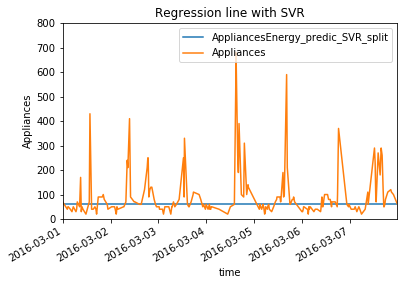

In [71]:
predict_DF_SVR_split_period=predict_DF_SVR_split["2016-03-01":"2016-03-07"]

plt.figure()
predict_DF_SVR_split_period.plot()
plt.xlabel("time")
plt.ylabel("Appliances")
plt.ylim([0,800])
plt.title("Regression line with SVR")
plt.show()

In the plot you can see the horizontal line

In conclusion with linear and regression you can find a model that badly fits the data (R2 sligthly less than 0.2).
With SVR and RF model is bad fitted.
To increase accurancy of model you should find other variables more correlated with Appliances or other models that fit better dataset 
